In [182]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
from tensorflow import keras
from tensorflow.keras import layers

In [184]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM,BatchNormalization, TimeDistributed, Conv1D,MaxPooling1D,GRU,Bidirectional
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping

In [185]:
gait = pd.read_csv("gaitFull.csv")
#gait = pd.read_csv("gaitFullModified2.csv")

In [186]:
X1 = gait.drop('label',  axis=1)
y = gait['label']

In [187]:
#'P1','P2','P3','x1','y1','z1','x2','y2','z2'
X = pd.DataFrame(X1 , columns= ['P1','P2','P3','r'])
Xa1 = pd.DataFrame(X1 , columns= ['x1','y1','z1'])
Xb1 = pd.DataFrame(X1 , columns= ['x2','y2','z2'])

In [188]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
Xa1 = sc.fit_transform(Xa1) 
Xb1 = sc.transform(Xb1) 

from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 1) 
  
Xa1 = pca.fit_transform(Xa1)   
explained_variance = pca.explained_variance_ratio_ 

from sklearn.decomposition import PCA 
  
pca1 = PCA(n_components = 1) 
  
Xb1 = pca1.fit_transform(Xb1)   
explained_variance = pca.explained_variance_ratio_ 

In [189]:
X.insert(3, "Xa1", Xa1, True) 
X.insert(4, "Xb1", Xb1, True) 

In [190]:
y.head(30)

0     1
1     1
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    3
16    3
17    3
18    4
19    4
20    4
21    4
22    4
23    4
24    4
25    4
26    4
27    4
28    1
29    1
Name: label, dtype: int64

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [192]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [193]:
X_train= X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test= X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [194]:
y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [195]:
y_train= y_train.reshape((y_train.shape[0],y_train.shape[1]))
#y_test= y_test.reshape((1,476,4))

In [196]:
X_train.shape

(1900, 6, 1)

In [197]:
es = EarlyStopping(monitor='val_loss', verbose=1)

In [198]:
model = Sequential()
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model.add(LSTM(64,activation='relu',return_sequences=True,input_shape=(n_timesteps, n_features)))
model.add(Bidirectional(LSTM(128,activation='relu',return_sequences=True)))
model.add(Conv1D(32,kernel_size=2,strides=1,activation='relu'))
model.add(MaxPooling1D(2,strides=1))
model.add(Conv1D(64,kernel_size=2,strides=1,activation='relu'))
model.add(MaxPooling1D(2,strides=1))
model.add(Conv1D(32,kernel_size=2,strides=1,activation='relu'))
model.add(Bidirectional(LSTM(64,activation='relu',return_sequences=True)))
model.add(Bidirectional(LSTM(128,activation='relu')))
model.add(BatchNormalization())
#model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 6, 64)             16896     
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 6, 256)            197632    
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 5, 32)             16416     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 4, 32)             0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 3, 64)             4160      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 1, 32)            

In [199]:
history=model.fit(X_train, y_train, epochs=100, batch_size=200, validation_split=0.2,shuffle=True)

Train on 1520 samples, validate on 380 samples
Epoch 1/100
1520/1520 [==============================] - 4s 2ms/step - loss: 1.5955 - accuracy: 0.4191 - val_loss: 1.5996 - val_accuracy: 0.3632
Epoch 2/100
1520/1520 [==============================] - 0s 242us/step - loss: 1.5143 - accuracy: 0.4355 - val_loss: 1.5885 - val_accuracy: 0.3500
Epoch 3/100
1520/1520 [==============================] - 0s 252us/step - loss: 1.3587 - accuracy: 0.4349 - val_loss: 1.5616 - val_accuracy: 0.2974
Epoch 4/100
1520/1520 [==============================] - 0s 245us/step - loss: 1.2679 - accuracy: 0.4842 - val_loss: 1.5201 - val_accuracy: 0.3132
Epoch 5/100
1520/1520 [==============================] - 0s 240us/step - loss: 1.2292 - accuracy: 0.5355 - val_loss: 1.4889 - val_accuracy: 0.3237
Epoch 6/100
1520/1520 [==============================] - 0s 259us/step - loss: 1.1927 - accuracy: 0.5487 - val_loss: 1.4621 - val_accuracy: 0.3132
Epoch 7/100
1520/1520 [==============================] - 0s 253us/step - 

1520/1520 [==============================] - 0s 245us/step - loss: 0.8468 - accuracy: 0.6454 - val_loss: 0.9528 - val_accuracy: 0.6158
Epoch 57/100
1520/1520 [==============================] - 0s 239us/step - loss: 0.8485 - accuracy: 0.6553 - val_loss: 0.9118 - val_accuracy: 0.6079
Epoch 58/100
1520/1520 [==============================] - 0s 247us/step - loss: 0.8499 - accuracy: 0.6467 - val_loss: 0.9385 - val_accuracy: 0.6184
Epoch 59/100
1520/1520 [==============================] - 0s 253us/step - loss: 0.8498 - accuracy: 0.6572 - val_loss: 0.9488 - val_accuracy: 0.5947
Epoch 60/100
1520/1520 [==============================] - 0s 251us/step - loss: 0.8566 - accuracy: 0.6480 - val_loss: 0.9391 - val_accuracy: 0.5895
Epoch 61/100
1520/1520 [==============================] - 0s 256us/step - loss: 0.8440 - accuracy: 0.6507 - val_loss: 0.9572 - val_accuracy: 0.6105
Epoch 62/100
1520/1520 [==============================] - 0s 250us/step - loss: 0.8549 - accuracy: 0.6500 - val_loss: 0.9699 

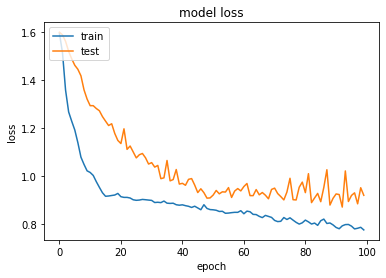

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


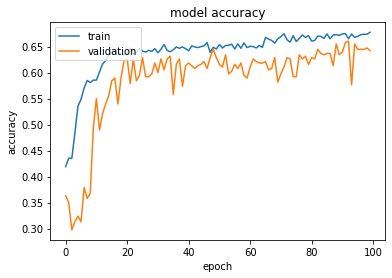

In [200]:
from pylab import rcParams
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [201]:
x=model.predict(X_test)

In [202]:
import tensorflow as tf
index = tf.argmax(x,axis=1)

In [203]:
z=np.array(index)

In [204]:
print(confusion_matrix(y_test, z))

[[ 29   9   0  15]
 [ 14 113   5  43]
 [  6   8  34  22]
 [ 23  16   5 134]]


In [205]:
d=confusion_matrix(y_test, z)

In [206]:
print(classification_report(y_test, z)) 

              precision    recall  f1-score   support

           1       0.40      0.55      0.46        53
           2       0.77      0.65      0.70       175
           3       0.77      0.49      0.60        70
           4       0.63      0.75      0.68       178

    accuracy                           0.65       476
   macro avg       0.64      0.61      0.61       476
weighted avg       0.68      0.65      0.65       476



In [207]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "12345678"],
              columns = [i for i in "12345678"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

ValueError: Shape of passed values is (4, 4), indices imply (8, 8)

### gait = pd.read_csv("gaitFullModified2.csv")

In [ ]:
X = gait.drop('label',  axis=1)
y = gait['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

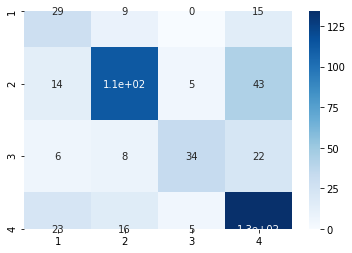

In [208]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "1234"],
              columns = [i for i in "1234"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [ ]:
model = Sequential()
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

model.add(Conv1D(100, kernel_size=5, input_shape=(n_timesteps, n_features)))
model.add(LSTM(100,
         return_sequences=False,activation='relu'))

model.add(Dropout(0.5))
#model.add(Flatten())


#model.add(LSTM(units=50,
 #        return_sequences=False))
#model.add(Dropout(0.2))

#model.add(Dense(200, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(units=n_outputs, activation='sigmoid'))
model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
  # Instantiate a SimpleMinCostFlow solver.
  min_cost_flow = pywrapgraph.SimpleMinCostFlow()

  # Add each arc.
  for i in range(0, len(start_nodes)):
    min_cost_flow.AddArcWithCapacityAndUnitCost(start_nodes[i], end_nodes[i],
                                                capacities[i], unit_costs[i])

  # Add node supplies.

  for i in range(0, len(supplies)):
    min_cost_flow.SetNodeSupply(i, supplies[i])